### 利用深度学习识别卫星数据

在本次作业中我们将会使用深度学习来解决分类问题。 给定的数据在 “point_data.csv”文件里，这个数据总共包含了5个类别（由Class_ID来区分）, 并包括10个特征。在这里，我们需要搭建多层的神经网络（具体细节在下面给出），并利用这个网络来识别分类。

In [1]:
# 导入library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TODO 导入跟keras相关的libraray


# 以下是跟sklearn相关的库
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics

import seaborn as sns
import keras
from   keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
# 导入数据

# TODO 设置数据文件的位置(path)
filename = 'point_data.csv'
dataset = pd.read_csv(filename)
#list(dataset)

In [3]:
dataset.head()

,x,y,Class_ID,B2,B3,B4,B5,B6,B7,B8,B8A,B11,B12,Class,Description
0,678191.453655,4.764069e+06,2,616,682,655,767,1669,1669,1922,2414,1726,1115,Class_2,Building
1,678193.971301,4.764069e+06,2,616,682,655,767,1669,1669,1922,2414,1726,1115,Class_2,Building
2,678196.488947,4.764069e+06,2,616,682,655,767,1669,1669,1922,2414,1726,1115,Class_2,Building
3,678191.453655,4.764067e+06,2,616,682,655,767,1669,1669,1922,2414,1726,1115,Class_2,Building
4,678193.971301,4.764067e+06,2,616,682,655,767,1669,1669,1922,2414,1726,1115,Class_2,Building


In [4]:
# 定义标签Y和特征X

# TODO: Y: 读取Class_ID字段
Y = dataset.iloc[:,2].values

# TODO：总共10个特征，分别读取 'B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12' 字段
X = dataset.iloc[:,3:13].values

X, Y

(array([[ 616,  682,  655, ..., 2414, 1726, 1115],
        [ 616,  682,  655, ..., 2414, 1726, 1115],
        [ 616,  682,  655, ..., 2414, 1726, 1115],
        ...,
        [ 337,  694,  445, ..., 4253, 2603, 1351],
        [ 337,  694,  445, ..., 4253, 2603, 1351],
        [ 337,  694,  445, ..., 4253, 2603, 1351]], dtype=int64),
 array([2, 2, 2, ..., 4, 4, 4], dtype=int64))

In [5]:
#sns.countplot(Y)

In [6]:
#sns.pairplot(dataset.iloc[:,3:14],hue='Class')

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y1 = encoder.fit_transform(Y)
Y2 = pd.get_dummies(Y1).values

# TODO: 对Y做一个简单的转换（不然会在keras部分会出错） 
Y2.shape

(23945, 5)

In [8]:
# 把数据分成训练数据和测试数据
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((19156, 10), (4789, 10), (19156, 5), (4789, 5))

In [9]:
# TODO: 做数据的归一化 （利用preporcessing.scale函数，详情查看官方文档）

from sklearn import preprocessing
stand_means = preprocessing.StandardScaler()

X_train = stand_means.fit_transform(X_train)
X_test =  stand_means.fit_transform(X_test)
X_train.shape,X_test.shape

((19156, 10), (4789, 10))

In [10]:
# 定义深度学习模型： 模型总共包含4层hidden layer, 第一层包括50个hidden units, 第二层包括50个hidden units, 第三层包括60个hidden units, 
#                第四层包括40个hidden units. 并在第一层hidden layer和第二层hidden layer之间添加一个dropout layer (rate=0.2),
#                在第二层和第三层hidden layer之间添加dropout layer（rate=0.2）, 第三层和第四层之间添加dropout layer（rate=0.1）。

# TODO: 定义各类变量（比如输入维度的大小，输出维度的大小，hidden layer的unit个数等）
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(50,input_shape=(10,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(60,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(40,activation='relu'))
model.add(Dense(5,activation='softmax'))


In [11]:
# 输出模型描述
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                3060      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 40)                2440      
__________

In [12]:
#  定义SGD(stochastic gradient descent优化器)，学习率为0.01.  
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [13]:
# 定义模型的compile函数，设置loss为sparse_categorical_crossentropy, 利用上面定义的sgd优化器，利用准确率作为评估标准
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])

In [14]:
# TODO: 训练模型，设置epoch为100， batch_Size为100，并把训练数据中的15%作为validation data(验证集), 把中间的结果都赋给history变量（后面做分析用）             
history = model.fit(X_train,Y_train,batch_size=100,epochs=100,validation_split=0.15)

Train on 16282 samples, validate on 2874 samples
Epoch 1/100
16282/16282 [==============================] - 1s 45us/step - loss: 0.7496 - acc: 0.7386 - val_loss: 0.3162 - val_acc: 0.8977
Epoch 2/100
16282/16282 [==============================] - 0s 15us/step - loss: 0.3556 - acc: 0.8726 - val_loss: 0.2728 - val_acc: 0.9106
Epoch 3/100
16282/16282 [==============================] - 0s 16us/step - loss: 0.3140 - acc: 0.8865 - val_loss: 0.2563 - val_acc: 0.9026
Epoch 4/100
16282/16282 [==============================] - 0s 16us/step - loss: 0.2852 - acc: 0.8978 - val_loss: 0.2352 - val_acc: 0.9172
Epoch 5/100
16282/16282 [==============================] - 0s 15us/step - loss: 0.2648 - acc: 0.9047 - val_loss: 0.2151 - val_acc: 0.9290
Epoch 6/100
16282/16282 [==============================] - 0s 14us/step - loss: 0.2530 - acc: 0.9112 - val_loss: 0.2041 - val_acc: 0.9297
Epoch 7/100
16282/16282 [==============================] - 0s 14us/step - loss: 0.2346 - acc: 0.9191 - val_loss: 0.1961 - v

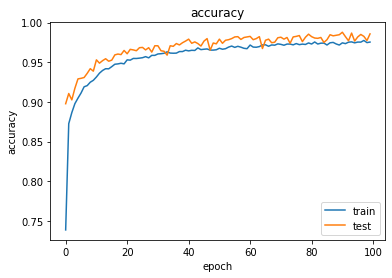

In [15]:
# 画一个图来表示准确率的变化情况（分别在训练数据和测试数据）
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

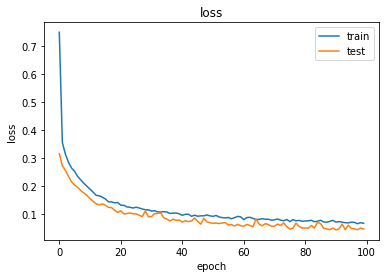

In [16]:
# 画一个图来表示LOSS的变化情况（分别在训练数据和测试数据）
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [17]:
# 在测试数据上做评估
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test, batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

4789/4789 [==============================] - 0s 4us/step
[0.05087485429351478, 0.9793276371600409]
Baseline Error: 2.07%


In [18]:
# 预测结果
test_class = model.predict_classes(X_test)

In [19]:
test_class1 = encoder.fit_transform(test_class)
test_class2 = pd.get_dummies(test_class1).values
Y_true = np.reshape(Y_test, [-1])
Y_pree = np.reshape(test_class2, [-1])

In [20]:
# TODO: 画混淆矩阵（confusion matrix）
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_true,Y_pree)

array([[19057,    99],
       [   99,  4690]], dtype=int64)

In [21]:
# TODO: 输出在测试集上的precision, recall, f1-score
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(Y_true, Y_pree, average = 'binary')
r = recall_score(Y_true, Y_pree, average='binary')
f1 = f1_score(Y_true, Y_pree, average='binary')
p,r,f1

(0.979327625809146, 0.979327625809146, 0.979327625809146)